In [326]:
import seaborn as sns
from IPython.display import display, Math, Latex
%pylab inline
print 'pylab version: %s' %(pylab.__version__)

Populating the interactive namespace from numpy and matplotlib
pylab version: 1.12.0


`%matplotlib` prevents importing * from pylab and numpy


## Problem Statement 1

You are given a string of letters, your goal is to rearrange it in alphabetical order. If the same letter is present both in lowercase and uppercase forms in the initial string, the uppercase occurrence should go first in the resulting string, ie.  'AAaBbcDeFFf'

In [2]:
import string
import random
letter_list = [random.choice(string.letters) for i in range(30)]
print('Original: '+''.join(letter_list))
sorted_ ="".join(sorted(letter_list, key=lambda L: (L.upper(),L)))
print('Sorted: '+ sorted_)

Original: uSeJIrZqUodXRuzOcmGeMciFSgoMMt
Sorted: ccdeeFGgIiJMMMmOooqRrSStUuuXZz


In [3]:
def bubble_way(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
#             print(passnum,i)
            if alist[i].lower() > alist[i+1].lower():
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
    return(alist)
sort_ = "".join(bubble_way(letter_list))
print(sort_)

ccdeeFGgIiJmMMMoOoqrRSStuUuXZz


In [4]:
## do it gain based on capitalization
sort_ = list(sort_)
for passnum in range(len(sort_)-1,0,-1):
    for i in range(0,len(sort_)-1):
        if sort_[i].lower() == sort_[i+1].lower():
            if sort_[i] > sort_[i+1]:
                temp = sort_[i]
                sort_[i] = sort_[i+1]
                sort_[i+1] = temp
sort_ ="".join(sort_)

In [5]:
sort_ == sorted_

True

The most reasonable answer is to sort the list twice, once for alphabetical and another for capitalization.

## Problem Statement 2

You have just moved into your first NYC apartment, however space is limited. You have $N$ items, each item is numbered $n_{i}$ and has a width $w_{i}$. You would like to put all items on your shelves, where each shelf has length $W$. Your goal is minimize the amount of shelves you will need to install.

* You may assume that for all your items $ w_{i}$ < $W$.
* There is no upper limit on the number of shelves you may use. 

This is a sorting problem: given N items of width wi for the ni'th object find number of W of finite length W, the number of objects with width less than W. So it's none of these given variables but NW = number of shelves. This is a shelf-packing problem. I have encountered a similar problem--the cutting stock problem.

The best way that I can think to solve this is through implementing a known algorithm and dissecting it to understand it better. 

The algorithm is a sorted First fit and works as follows:

"This is a very straightforward greedy approximation algorithm. The algorithm processes the items in arbitrary order. For each item, it attempts to place the item in the first bin that can accommodate the item. If no bin is found, it opens a new bin and puts the item within the new bin." -- From Wikipedia

In [116]:
class Shelves(object):
    """ Shelves for items that keeps a running sum """
    def __init__(self):
        self.items = []
        self.sum_val = 0

    def append(self, item):
        self.items.append(item)
        self.sum_val += item
        
def pack(values, maxValue):
    values = sorted(values, reverse=True)
    shelfs = []
    for item in values:
        # Try to fit item into a shelf
        for shelf in shelfs:
            if shelf.sum_val + item <= maxValue:
                shelf.append(item)
                break
        else:
            #If item didn't fit into any shelf, start a new shelf
            shelf = Shelves()
            shelf.append(item)
            shelfs.append(shelf)
    return shelfs

def packAndShow(aList, maxValue):

    print 'Items of total width: ', sum(aList), 'requires at least', (sum(aList)+maxValue-1)/maxValue, 'shelves'
    shelves = pack(aList, maxValue)
    print 'I need at least ', len(shelves), 'shelves:'
    
    print('')
    for shelf in shelves:
        print (shelf.sum_val, str(shelf.items))
    print

In [359]:
items = [1,2,3,4,5,6,1,2,3,4,5,6]
packAndShow(items, 16)

Items of total width:  42 requires at least 3 shelves
I need at least  3 shelves:

(16, '[6, 6, 4]')
(16, '[5, 5, 4, 2]')
(10, '[3, 3, 2, 1, 1]')



In [360]:
## DISTILLED ALGORITHM

values = sorted(items,reverse = True)
max_value = 16
set_ =[]
shelves = []
shelf = []
shelves.append(shelf)
for i in values:
    for s in shelves:
        if sum(s)+i <= max_value:
            s.append(i)
            break
    else:
        shelf = []
        shelf.append(i)
        shelves.append(shelf)

print(shelves)
print 
print 'number of shelves:',len(shelves)

[[6, 6, 4], [5, 5, 4, 2], [3, 3, 2, 1, 1]]

number of shelves: 3


In [325]:
shelves

[[6, 6, 4], [5, 5, 4, 2], [3, 3, 2, 1, 1]]

This algorithm is said to be Θ(n log n), but when the items or sorted the algorithm behaves better than this time complexity.

## Problem Statement 3

This problem will require data scraping. The dataset is based off of the [Statlog Data Set](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html). The dataset was split into multiple parts based on the purpose for which customers were applying for loans at a bank. 

Your task is to combine the data from all links provided in the table in the supplementry data, and combine the data back in to one dataset. The supplementary data can be found [here](http://www.pymetrics.com/data/challenge).




In [464]:
import urllib
from bs4 import BeautifulSoup
import requests

page = []
for i in range(1,1):
    url =' https://www.pymetrics.com/data/challenge/page/%d/'%i
    data = urllib.urlopen(url)
    url = url.format(str(i))
    print(url)
    r = requests.get(url) # where url is the above url    
    bs = BeautifulSoup(r.text,'lxml')
    page.append(i)

In [465]:
 bs.find('div',{"class":"data"})

<div class="data"><table class="dataTable" id="data"><thead><tr><td class="col" name="Status_Of_Existing_Checking_Account">c1</td><td class="col" name="Duration_In_Month">c2</td><td class="col" name="Credit_History">c3</td><td class="col" name="Credit_Amount">c5</td><td class="col" name="Savings_Account/Bonds">c6</td><td class="col" name="Present_Employment_Since">c7</td><td class="col" name="Installment_Rate_In_Percentage_Of_Disposable_Income">c8</td><td class="col" name="Personal_Status_And_Sex">c9</td><td class="col" name="Other_Debtors_/_Guarantors">c10</td><td class="col" name="Present_Residence_Since">c11</td><td class="col" name="Property">c12</td><td class="col" name="Age_In_Years">c13</td><td class="col" name="Other_Installment_Plans">c14</td><td class="col" name="Housing">c15</td><td class="col" name="Number_Of_Existing_Credits_At_This_Bank">c16</td><td class="col" name="Job">c17</td><td class="col" name="Number_Of_People_Being_Liable_To_Provide_Maintenance_For">c18</td><td c

In [536]:
page_row = []
num_rows =len(bs.find('div',{"class":"data"}).findAll('tr', {'class','tableRow'}))-1
for row in range(num_rows):
    page_col = []
    for col in range(0,20):
        page_col.append(bs.find('div',{"class":"data"}).findAll('tr', {'class','tableRow'})[row].findAllNext('td')[col].text.strip('><'))
    page_row.append(page_col)

KeyboardInterrupt: 

In [538]:
page_row

[[u'A11',
  u'24',
  u'A33',
  u'4870',
  u'A61',
  u'A73',
  u'3',
  u'A93',
  u'A101',
  u'4',
  u'A124',
  u'53',
  u'A143',
  u'A153',
  u'2',
  u'A173',
  u'2',
  u'A191',
  u'A201',
  u'2'],
 [u'A12',
  u'30',
  u'A34',
  u'5234',
  u'A61',
  u'A71',
  u'4',
  u'A94',
  u'A101',
  u'2',
  u'A123',
  u'28',
  u'A143',
  u'A152',
  u'2',
  u'A174',
  u'1',
  u'A191',
  u'A201',
  u'2'],
 [u'A12',
  u'12',
  u'A32',
  u'1295',
  u'A61',
  u'A72',
  u'3',
  u'A92',
  u'A101',
  u'1',
  u'A123',
  u'25',
  u'A143',
  u'A151',
  u'1',
  u'A173',
  u'1',
  u'A191',
  u'A201',
  u'2']]

So this is taking a while to check. It's complexity is too high to be efficient for each page. Essentially, this breaks down each page into the rows and columns  into making it into either one giant array or a series of dataframes which I could concatinate together.

Instead I'll move to using the completed dataset from UCI for the remaining parts.

In [10]:
catagorical = open('german.data').read()
catagorical = catagorical.split('\n')
new_row = []
for row in catagorical:
    new_row.append(row.split(' '))
catagorical = pd.DataFrame(new_row)

Lets Make the columns more descriptive

In [11]:
catagorical.columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','A18','A19','A20','A21']

In [12]:
catagorical.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


So make qualititavie values encoded while not encoding the others that are numerical. 

In [13]:
cat_dum = pd.get_dummies(catagorical,columns =['A1','A3','A4','A6','A7','A9','A10','A12','A14','A15','A17','A19','A20','A21'])
cat_dum.shape

(1001, 64)

In [14]:
cat_dum.columns

Index([u'A2', u'A5', u'A8', u'A11', u'A13', u'A16', u'A18', u'A1_', u'A1_A11',
       u'A1_A12', u'A1_A13', u'A1_A14', u'A3_A30', u'A3_A31', u'A3_A32',
       u'A3_A33', u'A3_A34', u'A4_A40', u'A4_A41', u'A4_A410', u'A4_A42',
       u'A4_A43', u'A4_A44', u'A4_A45', u'A4_A46', u'A4_A48', u'A4_A49',
       u'A6_A61', u'A6_A62', u'A6_A63', u'A6_A64', u'A6_A65', u'A7_A71',
       u'A7_A72', u'A7_A73', u'A7_A74', u'A7_A75', u'A9_A91', u'A9_A92',
       u'A9_A93', u'A9_A94', u'A10_A101', u'A10_A102', u'A10_A103',
       u'A12_A121', u'A12_A122', u'A12_A123', u'A12_A124', u'A14_A141',
       u'A14_A142', u'A14_A143', u'A15_A151', u'A15_A152', u'A15_A153',
       u'A17_A171', u'A17_A172', u'A17_A173', u'A17_A174', u'A19_A191',
       u'A19_A192', u'A20_A201', u'A20_A202', u'A21_1', u'A21_2'],
      dtype='object')

In [15]:
cat_dum.head()

,A2,A5,A8,A11,A13,A16,A18,A1_,A1_A11,A1_A12,...,A17_A171,A17_A172,A17_A173,A17_A174,A19_A191,A19_A192,A20_A201,A20_A202,A21_1,A21_2
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,1,0,1,0,0,1


In [16]:
combined = pd.concat([data,catagorical],axis =1)
combined.head()

,0,1,2,3,4,5,6,7,8,9,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,,1,6,4,12,5,5,3,4,1,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,,2,48,2,60,1,3,2,2,1,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,,4,12,4,21,1,4,3,3,1,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,,1,42,2,79,1,4,3,4,2,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,,1,24,3,49,1,3,3,4,4,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## Problem Statement 4

This problem involves taking the data scraped in Problem 3 and conducting some exploratory data analysis and building a predictive model. A modified description can be found [here](http://www.pymetrics.com/data/challenge/description/), that contains more informative names for the data attibutes/values than those provided in the data below that can be used in your analysis/modeling. 

Perform any preliminary data analysis that you deem neceassry to better understand the data and inform your model building process. This may include but is not limited to: checking for cleanliness, summary statistics, informative visualization, feature exploration, etc. Make sure to summarize any insights, trends, and/or interesting things you discover during your analysis.


## Explore Correlations of features

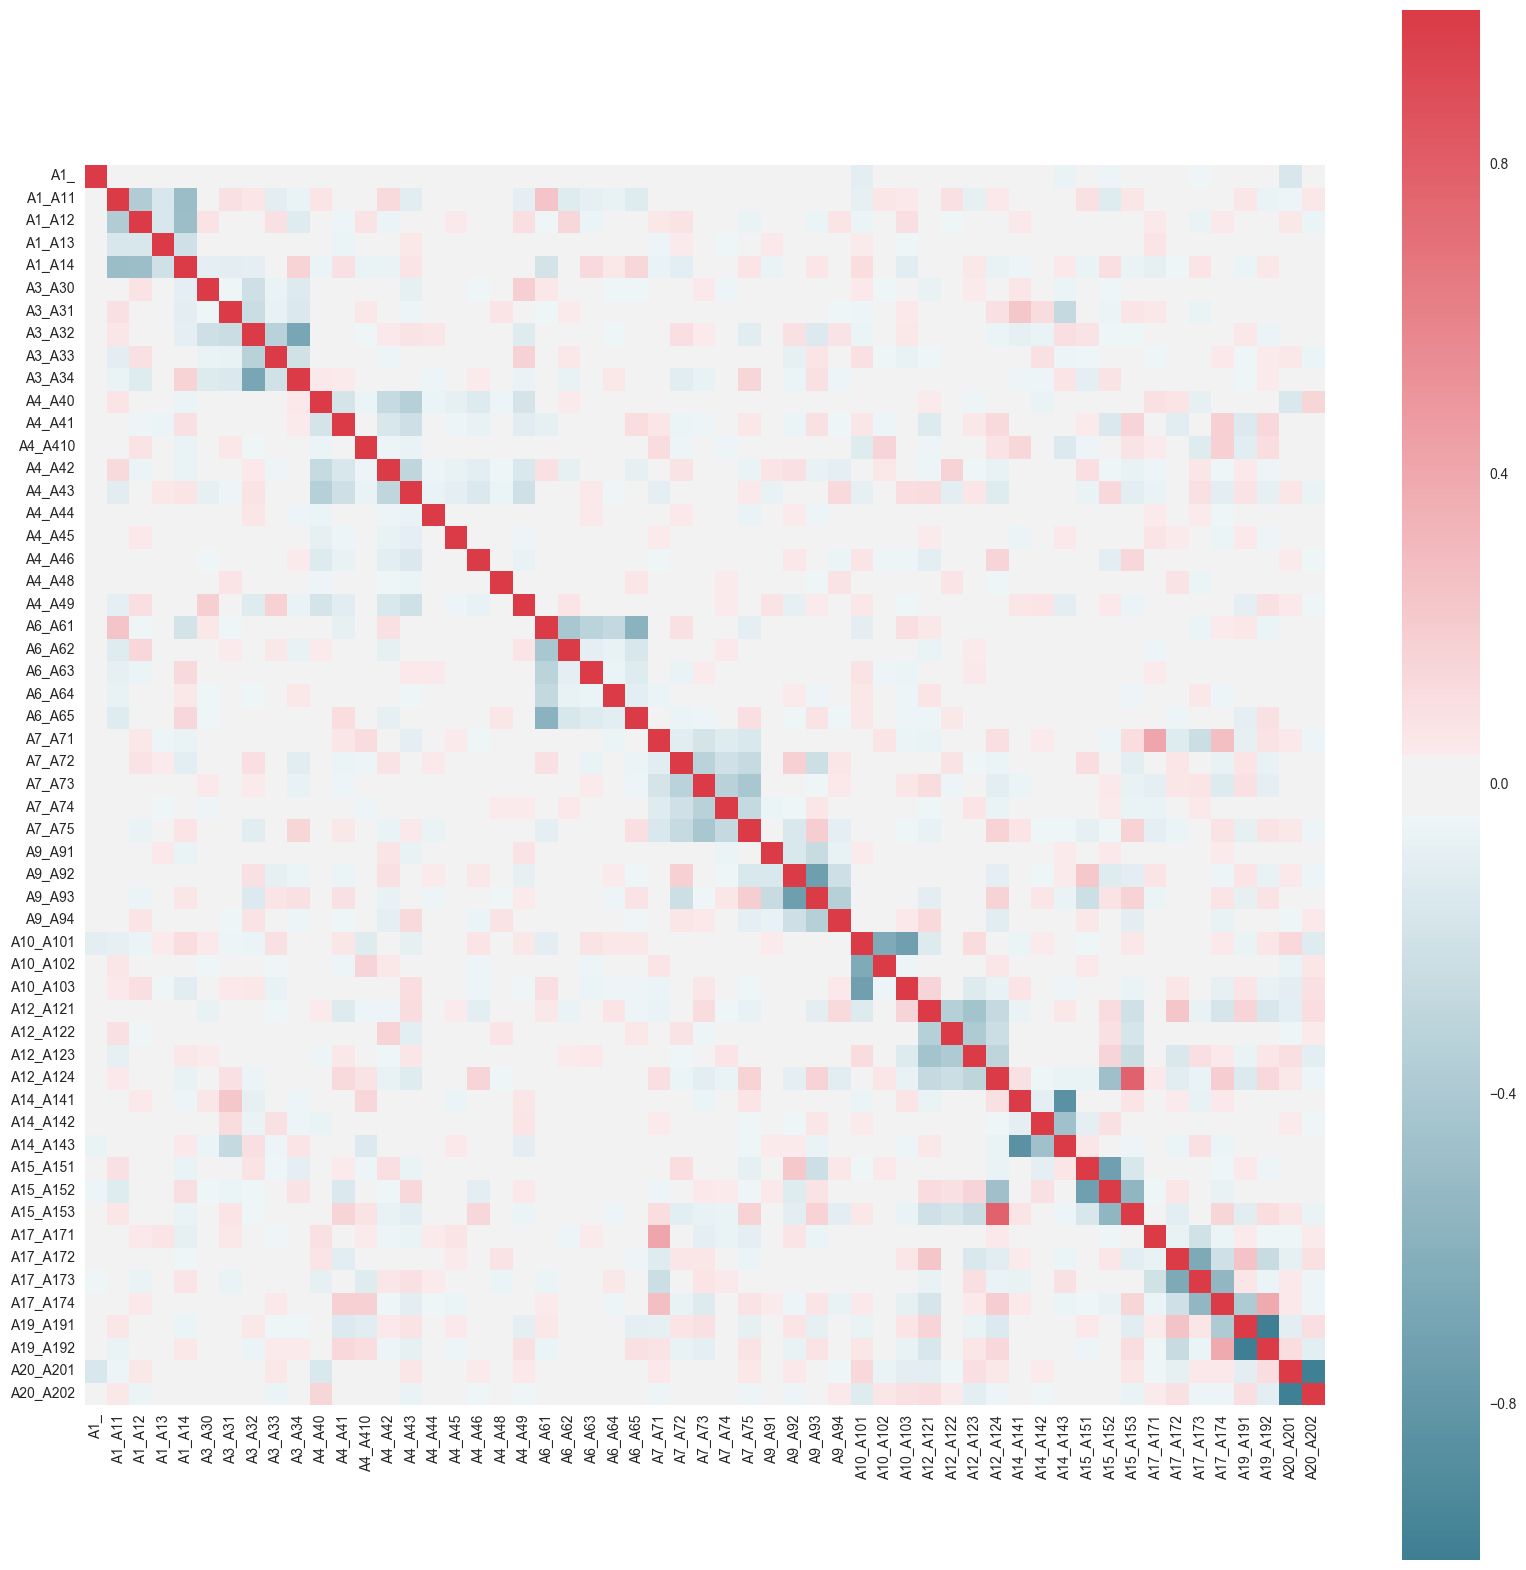

In [17]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy

data = cat_dum.iloc[:,:-2]
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
# fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names)
# ax.set_yticklabels(names)
sns.heatmap(correlations, mask=np.zeros_like(correlations, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

There are a few instances of strongly correlated features, but it's not enought to dive into all of them.

## Looking at categorical values

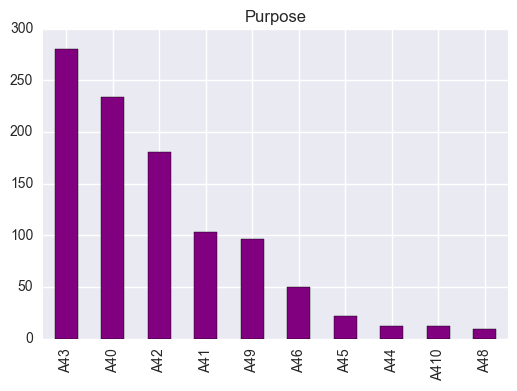

In [18]:
catagorical['A4'].value_counts().plot(kind = 'bar',color='purple')
# Where Attribute 4, index 3, is the purpose of the insurace
plt.title('Purpose')
# A40 : car (new) 
# A41 : car (used) 
# A42 : furniture/equipment 
# A43 : radio/television 
# A44 : domestic appliances 
# A45 : repairs 
# A46 : education 
# A47 : (vacation - does not exist?) 
# A48 : retraining 
# A49 : business 
# A410 : others 

Purpose of insurance is highest for radio/television and cars.

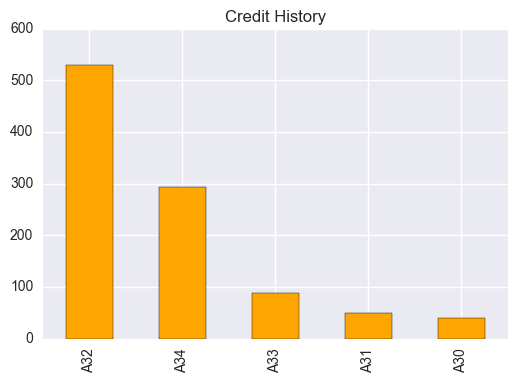

In [19]:
catagorical['A3'].value_counts().plot(kind = 'bar',color = 'orange')
plt.title('Credit History')
# A30 : no credits taken/ all credits paid back duly 
# A31 : all credits at this bank paid back duly 
# A32 : existing credits paid back duly till now 
# A33 : delay in paying off in the past 
# A34 : critical account/ other credits existing (not at this bank) 

Most users have an existing credit history or a critical amount.

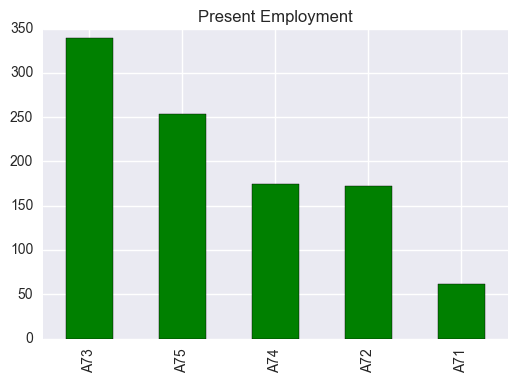

In [20]:
catagorical['A7'].value_counts().plot(kind = 'bar',color = 'green')
plt.title('Present Employment')
# Attribute 7: (qualitative)
# Present employment since
# A71 : unemployed
# A72 : ... < 1 year
# A73 : 1 <= ... < 4 years 
# A74 : 4 <= ... < 7 years
# A75 : .. >= 7 years

Most people have been employed less than four years. Very few people are unemployed.

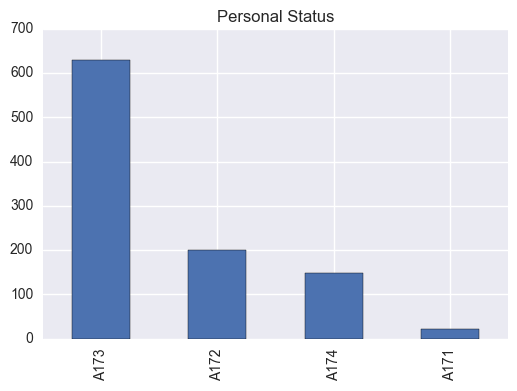

In [22]:
catagorical['A17'].value_counts().plot(kind = 'bar')
plt.title('Personal Status')
# A171 : unemployed/ unskilled - non-resident 
# A172 : unskilled - resident 
# A173 : skilled employee / official 
# A174 : management/ self-employed/ 
# highly qualified employee/ officer 

The highest Employment status is a skilled employee and the lowest is unemployed. That's sensible enough.

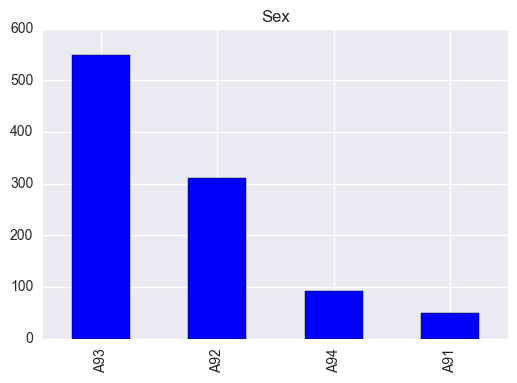

In [323]:
catagorical['A9'].value_counts().plot(kind = 'bar',color = 'blue')
plt.title('Sex')
# Attribute 9: (qualitative)
# Personal status and sex
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single

The highest sex count is single males, the least is divorced males.

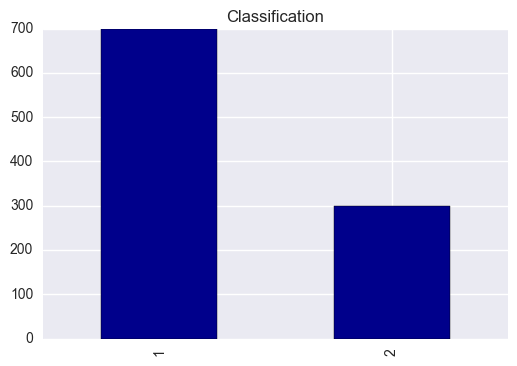

In [329]:
catagorical['A21'].value_counts().plot(kind = 'bar',color = 'darkblue')
plt.title('Classification')
# Attribute 9: (qualitative)
# Personal status and sex
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single

This is very informative that there are more good then bad classifications for the data. To offset this I can add class weights to the models.

## Looking into quantitative columns distributions

In [314]:
catagorical.shape

(1001, 21)

In [315]:
catagorical.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1


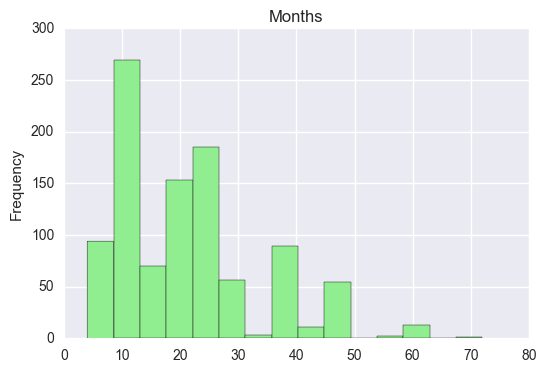

In [316]:
catagorical['A2'].astype('float').plot(kind = 'hist',bins=15,color = 'lightgreen')
plt.title('Months')
# Attribute 2: (numerical)
# Duration in month

The duration in months is more frequent around 20-30 months or 1-3 years.

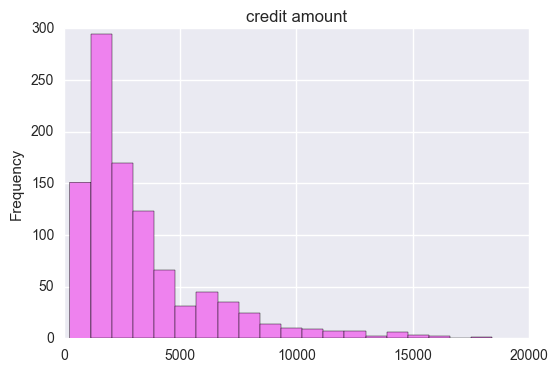

In [318]:
catagorical['A5'].astype('float').plot('hist',color = 'violet',bins =20)
plt.title('credit amount')
# Attribute 5: (numerical)
# Credit amount

The lower the credit amount the higher the frequency. There are more people with lower credit scores.

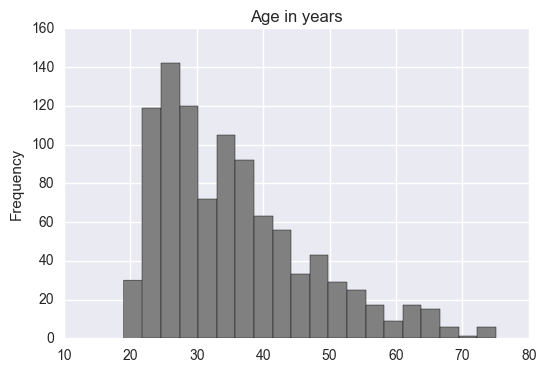

In [308]:
catagorical['A13'].astype('float').plot('hist',title='Age in years',color='grey',bins =20)
# Attribute 13: (numerical)
# Age in years

The frequency peaks around 20-30 years old.

It's interesting to see how these are distributed but in terms of aiding in modeling it's not obvious. I'll have to look into feature engineering at the model is built.

## Problem Statement 5

Build a model using the scraped data in Problem 3 to predict whether a customer has Good=1 or Bad=2 credit, the label Good/Bad is given in column c21 in the data tables. 

Create two models, one using SVMs and another using a different algorithm of your choice. Showing a good predictive modeling process is as important as the final model's performance. 

Please provide some insights on your models. This may include but is not limited to: why you picked your second model, a comparison of the pros and cons of the two models, any assumptions that you are making with your modeling process,  etc. Finally, discuss your models in the context of your data analysis in Problem 4. 



In [29]:
## I feel the most comfortable with the catagorical data with dummy columns
cat_dum.head()

,A2,A5,A8,A11,A13,A16,A18,A1_,A1_A11,A1_A12,...,A17_A171,A17_A172,A17_A173,A17_A174,A19_A191,A19_A192,A20_A201,A20_A202,A21_1,A21_2
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,0,0,1,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,1,...,0,0,1,0,1,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,1,0,1,0,1,0,0,1


In [30]:
#Drop the last row
cat_dum.drop(1000,axis =0,inplace = True)

In [258]:
from sklearn.cross_validation import train_test_split
X,y = cat_dum.iloc[:,:-2],cat_dum.iloc[:,-2] 
print X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

(1000, 62) (1000,)


In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '-', color="r",
             label="Train")
    plt.plot(train_sizes, test_scores_mean, '-', color="g",
             label="Test")

    plt.legend(loc="best")
    return plt

## Looking at SVM classifier

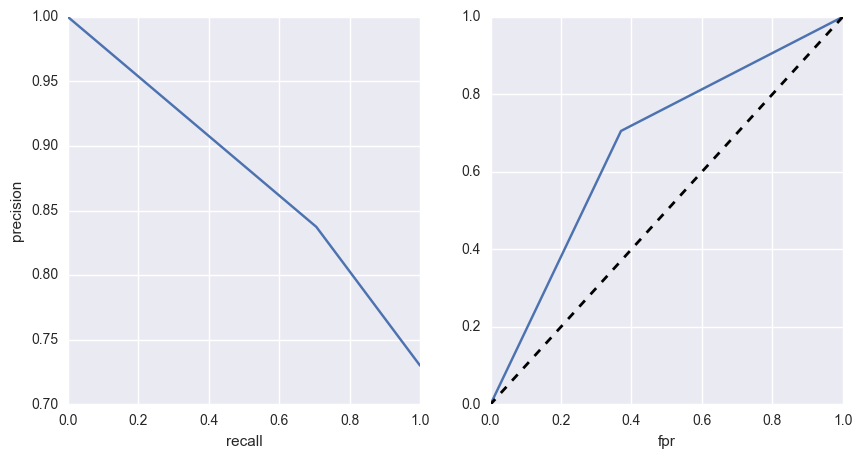

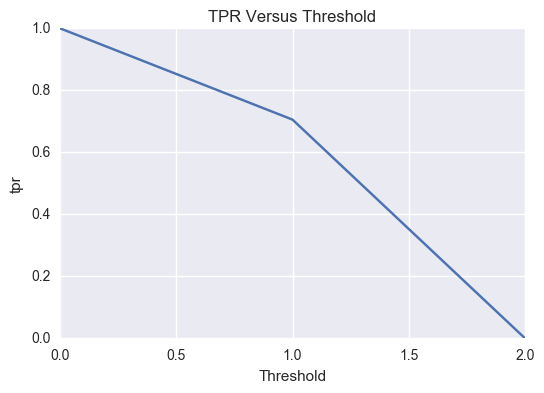

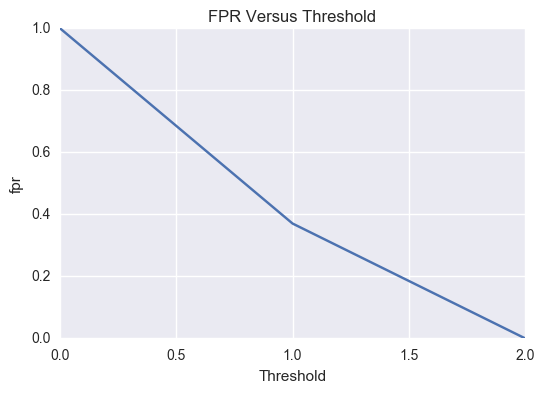

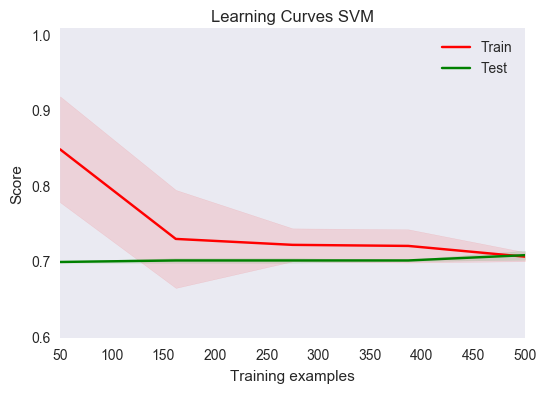

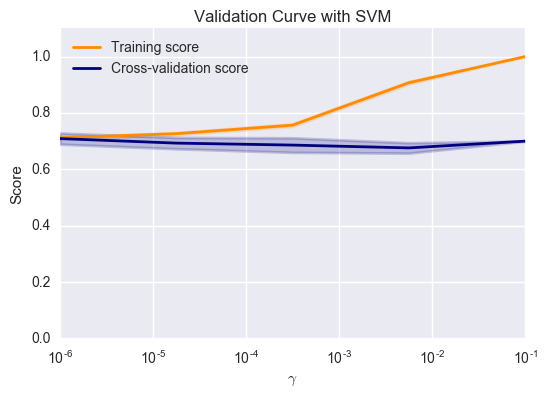

             precision    recall  f1-score   support

          0       0.44      0.63      0.52        54
          1       0.84      0.71      0.77       146

avg / total       0.73      0.69      0.70       200

accuracy:  0.685


In [351]:
import ml_insights as mli
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve

svm = SVC(C=10**5,gamma = 10**(-7),class_weight='balanced',kernel='rbf')
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)
prec, rec, thresh = precision_recall_curve(y_test,y_pred)
fpr,tpr, thresh2 = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(rec,prec)

plt.xlabel('recall')
plt.ylabel('precision')
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
plt.plot([1,0], [1,0], 'k--', lw=2)
plt.xlabel('fpr')
plt.show()

# F1 = 2 * (prec * rec) / (prec + rec)
thresh2 = list(thresh2)
# thresh.append(1)
plt.plot(thresh2,tpr)
plt.title('TPR Versus Threshold')
plt.ylabel('tpr')
plt.xlabel('Threshold')
plt.show()

# F1 = 2 * (prec * rec) / (prec + rec)
thresh2 = list(thresh2)
# thresh.append(1)
plt.plot(thresh2,fpr)
plt.title('FPR Versus Threshold')
plt.ylabel('fpr')
plt.xlabel('Threshold')
plt.show()

title = "Learning Curves SVM"
# SVC is more expensive so we do a lower number of CV iterations:
estimator = SVC(gamma=10**-7)
plot_learning_curve(estimator, title, X, y, (0.6, 1.01), cv= 2, n_jobs=-1)
plt.show()

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


print metrics.classification_report(y_test,y_pred > 0.5)
print 'accuracy: ',metrics.accuracy_score(y_test,y_pred > 0.5)

The learning curve shows us that if we add more training samples, will our model improve. A score of 1 is no error is the lowest error.

The learning curve for SVM shows a convergence of training and test error. This might show high bais, but according to the precision recall and ROC curve, the predictive power is rather low, but more informative than a random guess, of course. 

The validation curve shows different values of gamma for the svm and helps tune the model. The training score goes up for gamma, but cross-validation goes down. 

## Logistic Regression

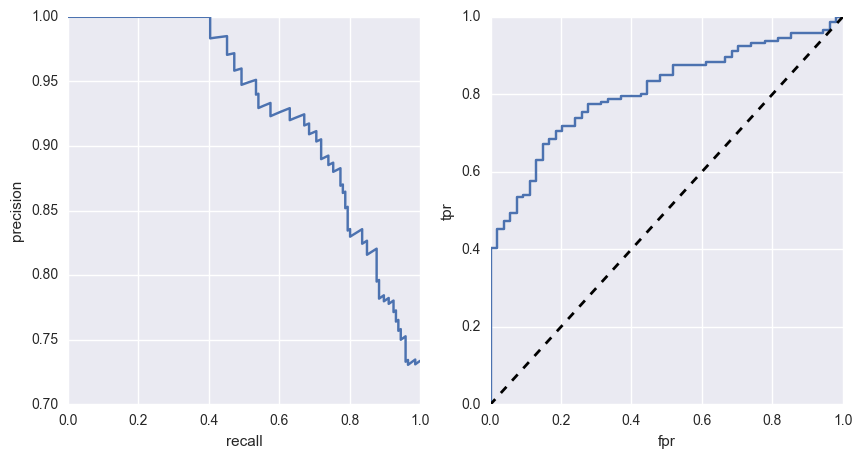

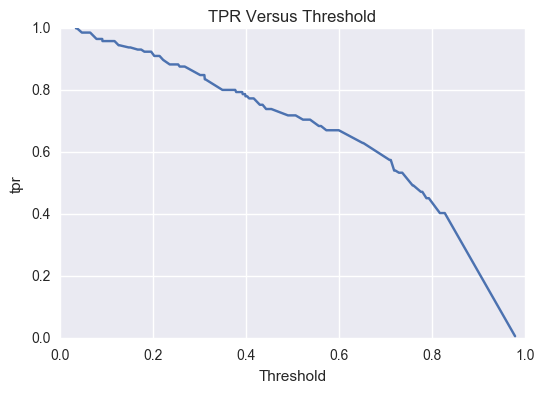

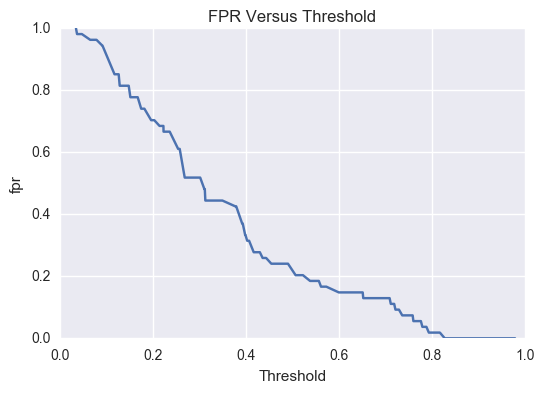

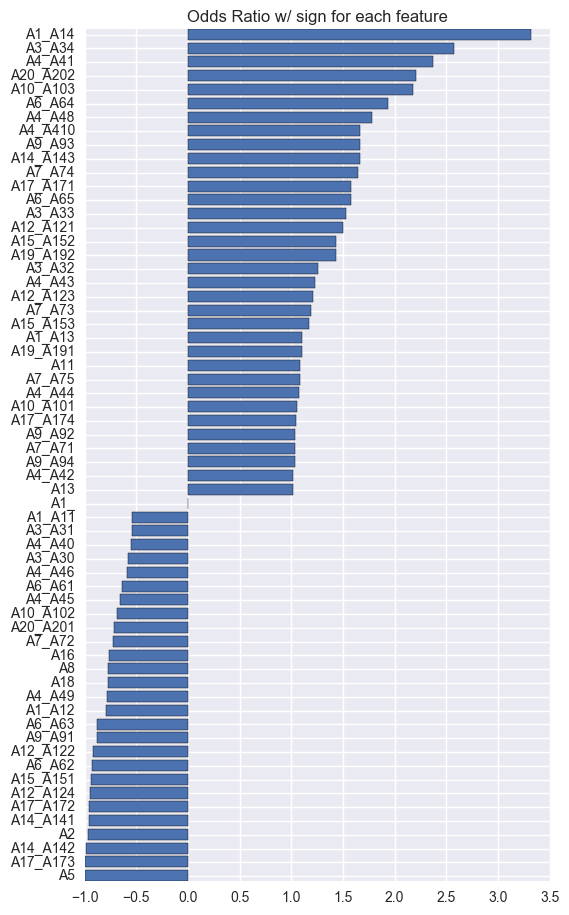

At threshold = 0.5
             precision    recall  f1-score   support

          0       0.51      0.78      0.61        54
          1       0.90      0.72      0.80       146

avg / total       0.79      0.73      0.75       200

accuracy:  0.735


In [352]:
import ml_insights as mli
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
lr = LogisticRegression(class_weight ='balanced')
lr.fit(X_train,y_train)
y_pred = lr.predict_proba(X_test)[:,1]
prec, rec, thresh_ = precision_recall_curve(y_test,y_pred)
fpr,tpr, thresh = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(rec,prec)
plt.xlabel('recall')
plt.ylabel('precision')
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
plt.plot([1,0], [1,0], 'k--', lw = 2)
plt.xlabel('fpr')
plt.ylabel('tpr')

plt.show()
# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh,tpr)
plt.title('TPR Versus Threshold')
plt.ylabel('tpr')
plt.xlabel('Threshold')
plt.show()

plt.show()
# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh,fpr)
plt.title('FPR Versus Threshold')
plt.ylabel('fpr')
plt.xlabel('Threshold')
plt.show()

odds = np.exp(lr.coef_[0])*np.sign(lr.coef_[0])
sorted_index = odds.argsort()
fig, ax = plt.subplots(figsize=(6, 11))  
width = 0.75 # the width of the bars 
ind = np.arange(X_test.shape[1])  # the x locations for the groups
ax.set_yticks(ind+width/2)
ax.set_yticklabels(X_test.columns[sorted_index])
ax.barh(ind, odds[sorted_index])
plt.title('Odds Ratio w/ sign for each feature')
plt.show()

print("At threshold = 0.5")
# It is worse to class a customer as good when they are bad, 
# than it is to class a customer as bad when they are good.
print metrics.classification_report(y_test,y_pred > 0.5)
print 'accuracy: ',metrics.accuracy_score(y_test,y_pred > 0.5)

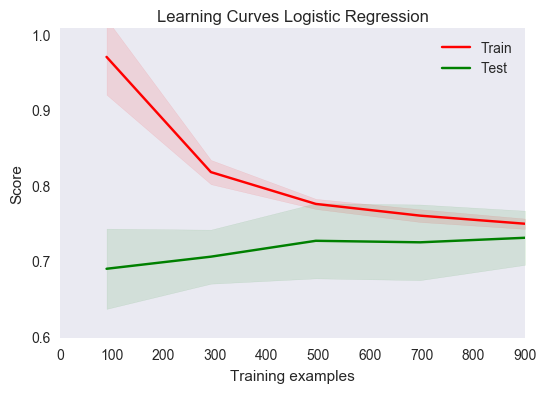

In [307]:
title = "Learning Curves Logistic Regression"
plot_learning_curve(lr, title, X, y, (0.6, 1.01), cv=10, n_jobs=-1)
plt.show()

This model as well suffers from high bias. Pruning features would be the best course of action for this model to increase the testing score.


The benefit of this model is the odds ratio that can be calculated from the coefficients learned from the data.

The odds ratio shows: "represents the constant effect of a predictor X, on the likelihood that one outcome will occur."

The ROC and precision-recall are the strongest for the three models and demonstrate a solid range of thresholds to choose from to get the strongest hard predictor.



## Random Forest

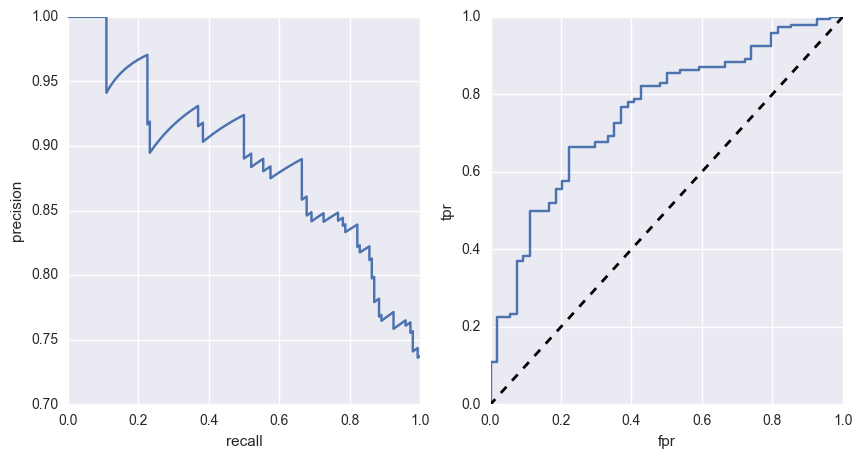

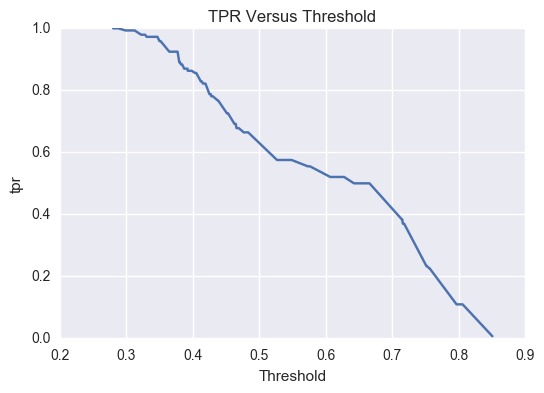

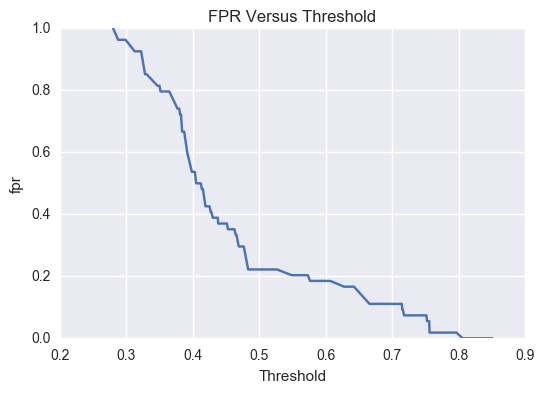

At threshold = 0.5
             precision    recall  f1-score   support

          0       0.51      0.78      0.61        54
          1       0.90      0.72      0.80       146

avg / total       0.79      0.73      0.75       200

accuracy:  0.735


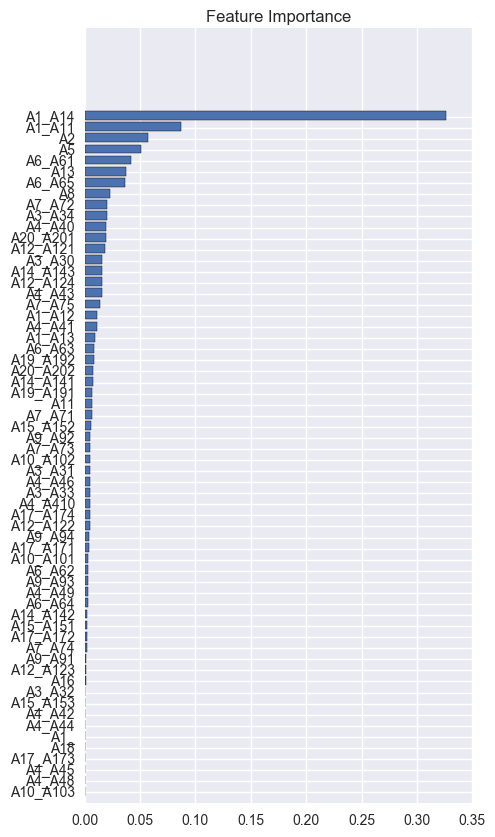

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
# X_train, X_test, y_train,y_test = train_test_split(features,target,test_size =  0.22)
rfc = RandomForestClassifier(n_estimators = 20,n_jobs=-1,max_depth=4,class_weight = 'balanced')

rfc.fit(X_train,y_train)
predict = rfc.predict_proba(X_test)[:,1]
prec, rec, thresh_ = precision_recall_curve(y_test,predict)
fpr,tpr, thresh2 = roc_curve(y_test,predict)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(rec,prec)

plt.xlabel('recall')
plt.ylabel('precision')
plt.subplot(1,2,2)
plt.plot(fpr,tpr)
plt.plot([1,0], [1,0], 'k--', lw=2)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh)
# thresh.append(1)
plt.plot(thresh2,tpr)
plt.title('TPR Versus Threshold')
plt.ylabel('tpr')
plt.xlabel('Threshold')
plt.show()

# F1 = 2 * (prec * rec) / (prec + rec)
thresh = list(thresh2)
# thresh.append(1)
plt.plot(thresh,fpr)
plt.title('FPR Versus Threshold')
plt.ylabel('fpr')
plt.xlabel('Threshold')
plt.show()


sort_index = np.argsort(rfc.feature_importances_)
importances = rfc.feature_importances_
sort_importances = importances[sort_index]
# plt.subplot(1,2,1)
fig, ax = plt.subplots(figsize =(5,10))
ind = np.array(range(len(X_test.columns[sort_index])))+.7
# plt.figure(figsize = (10,20))

plt.barh(ind,sort_importances);
ax.set_yticks(ind + .3);
ax.set_yticklabels((X_test.columns[sort_index]))
plt.title('Feature Importance')

print("At threshold = 0.5")
print metrics.classification_report(y_test,y_pred>0.5)
print 'accuracy: ',metrics.accuracy_score(y_test,y_pred>0.5)

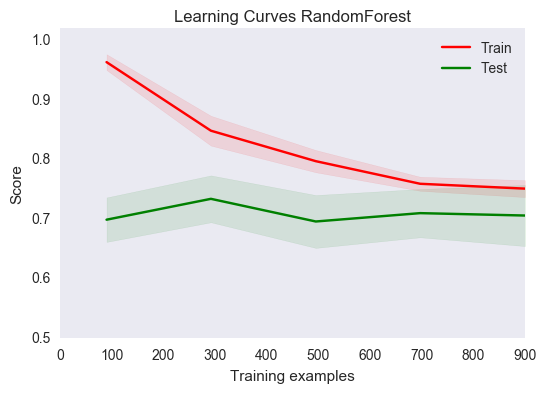

In [305]:
title = "Learning Curves RandomForest"
# SVC is more expensive so we do a lower number of CV iterations:
plot_learning_curve(rfc, title, X, y, (0.5, 1.02), cv=10, n_jobs=-1)
plt.show()

The model suffers from the least amount of bias and is probably the most informative model. It shows the feature importance and is surprisingly helpful for analyzing the the strength of the features. The ROC and precision-recall curves are very strong and show that it is a strong predictive model. Of course, I could get rid of the least important features and make a more predictive model based on those set of features.

#### Analysis of models


All three models are do a decent job, but they have their strenghts and weeknesses depending on what the goal is.



The svm does a decent job, but requires a decent amount of parameter tuning an doesn't shine a light on the population explorations. The feature importance of the random forest and the odds ratio of the logistic regression at least show, for well fitting models, which features of the data are important for good or bad credit.

The analysis previously shed light into the skew of the data, which prompted me to look into the class_weight = 'balancing' feature of the SVM model, the logistic regression model , and the RandomForest. 

from the notes of logistic regression: ""class_weight : dict or 'balanced', default: None
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one.

    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``.""
    
    
Aside from this, the features that were most impactful were:

## from the LogisticRegression:
#### positive:

Attribute 1: (qualitative)
Status of existing checking account
    A14 : no checking account

Attribute 3: (qualitative)
Credit history
    A34 : critical account/
    other credits existing (not at this bank)

Attribute 4: (qualitative)
Purpose
    A41 : car (used)

Attribute 20: (qualitative)
    foreign worker 
    A202 : no


Attribute 9: (qualitative)
Personal status and sex
    A93 : male : single

Attibute 6: (qualitative)
Savings account/bonds
    A64 : .. >= 1000 DM


#### Negative:

Attribute 5: (numerical)
Credit amount

A14 (qualitative)
Other installment plans 
    A142 : stores

Attribute 2: (numerical)
Duration in month


## from the RandomForest:
    A1_A14 : no checking account
    
    Attribute 5: (numerical)Credit amount
    
    Attribute 2: (numerical) Duration in month
    
    A11 : ... < 0 DM

To summarize, from the logistic regression, I know that the odds ratio tells me how much more likely, given that feature, a person is to have good credit. The features with higher odds ratio, means that as that feature increases the more likely the person is to have better credit, where an absolute value greater than one has some significance. Those features that do are whether they have a credit history, if they have other credit cards, if they are getting a car, and are not a foreign worker, that is male and has more than 1000 DM in savings. What affects them negatively is their credit amount and the duration of their credit

From the random forest we see that decide which features have the greatest importance in deciding good or bad credit, relative to all feature importances. The higher the importance features were the credit amount, having no checking, the time in months and at least making more than 0 DM.  This kind of analysis can go on.

This type of analysis, using a well tuned model, can be useful to show trends in the data and instruct us where to look more closely at certain segments and see if there is more going on than what we're seeing. This involves segmenting the data accordingly to specialize the model even further.

As an aside, I left the thresholds at 0.5 to demonstrate and see the accuracy and precision, but this could be changed to fit a criteria so that given a model a threshold can be chosen where there is a low false positive rate and a higher true positive rate based on the TPR and FPR graphs.